# Load the data

In [1]:
import numpy as np
import pandas as pd

#import the data
print('loding the data...')
df=pd.read_csv('responses.csv')#len(df.columns) 150
df.head()

loding the data...


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# Visualization

In [ ]:
df.head()
df.head()
#df.tail()
#df.describe() #gives stats for all numeric datatypes
df.describe(include='all')
#df.info()

In [ ]:
print(" rows and columns : ", df.shape)
num = df.shape[0] # no of entries

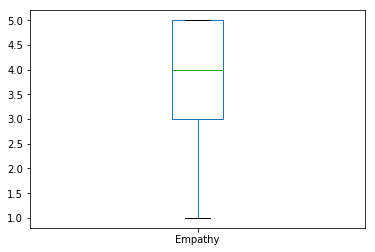

In [4]:
# box-whisker plot
%matplotlib inline
df.Empathy.plot(kind='box');

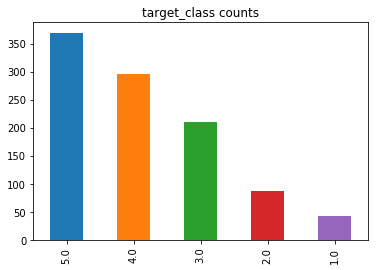

In [5]:
#train_df.target.value_counts()
#train_df.target.value_counts(normalize=True)
df.Empathy.value_counts().plot(kind='bar', title='target_class counts')

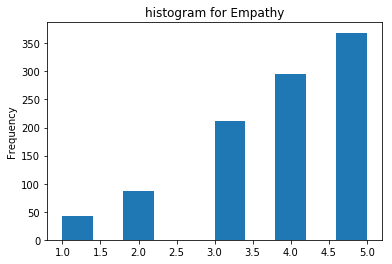

In [7]:
df.Empathy.plot(kind='hist', title='histogram for Empathy');

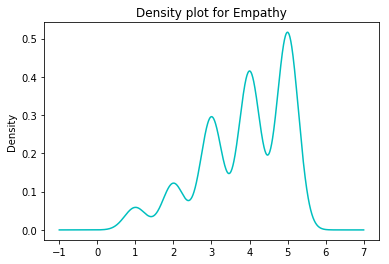

In [8]:
# use kde for density plot
df.Empathy.plot(kind='kde', title='Density plot for Empathy', color='c');

In [9]:
print('skewness for Empathy : {0:.2f}'.format(df.Empathy.skew()))

skewness for Empathy : -0.77


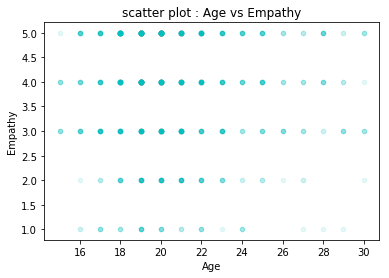

In [11]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Empathy', color='c', title='scatter plot : Age vs Empathy',alpha=0.1);

### Datatypes

In [ ]:
dtype_df = df.dtypes.reset_index()
#dtype_df
dtype_df.columns = ["Count", "Column Type"]
#dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index() #counting no. of rows in different datatypes 

# Preprocessing

### Missing Values

In [ ]:
print('Preprocessing...')
missing_df = df.isnull().sum(axis=0).reset_index() #gives how many null values are present in each column
#missing_df # reset index attaches a new index column starting with 0
missing_df.columns = ['column_name', 'missing_count'] #naming the columns
#missing_df
missing_df = missing_df[missing_df['missing_count']>0]# printing  missing values 
#missing_df # printing  missing values 
missing_df = missing_df.sort_values(by='missing_count')
missing_df

In [ ]:
## replacing null values with majority value

cols=list(df.columns)
#print(cols)
df[cols]=df[cols].fillna(df.mode().iloc[0])

#coln=df.columns
#for i in coln:
#    df = df.fillna({i: df[i].mode()[0]}, inplace=True)

In [ ]:

#convert object datatype to categorical
#in python- int, float, bool, datetime, timedelta, object, categorical
print('converting categorical to numeric..')
for y in df.columns:
    if df[y].dtype.kind=='O':
        df[y]=df[y].astype('category')
        #print(df[y].dtype)
        #print(df[y]
df

#one hot encoding
print('one hot encoding..')
df1=pd.get_dummies(df, columns=['Smoking','Alcohol','Punctuality','Lying','Internet usage','Gender','Left - right handed','Education','Only child','Village - town','House - block of flats'], prefix=["sm", "al", "pu","ly","internet", "gender","handedness","edu","onlychild","town","house"
])
#df1


In [ ]:

print('Splitting the data into X and y')
#splitting into X and y
y=df1['Empathy']
#y=y_notvalues.values
print(type(y))
df1 = df1.drop('Empathy', 1)


#train test split
from sklearn.model_selection import train_test_split
#split into X and Y


print('train, dev, test split')
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=1) #train 80, test 20

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1) #train 64%, 16%

print(type(y_train))

## classification

In [ ]:
#classification

from sklearn import tree
print('Trying with decisio tree classifier')
clf=tree.DecisionTreeClassifier()#tune it.
clf.fit(X_train,y_train)

prediction=clf.predict(X_val)
accuracy=np.mean((prediction)==y_val)
print('Development accuracy with decision tree is ', accuracy)


prediction=clf.predict(X_test)
accuracy=np.mean((prediction)==y_test)
print('Test accuracy with decision tree is ', accuracy)
#0.321782178218


In [ ]:
from sklearn import naive_bayes
from nltk.classify import NaiveBayesClassifier
clf=naive_bayes.MultinomialNB()

clf.fit(X_train, y_train)

prediction=clf.predict(X_val)
accuracy=np.mean((prediction)==y_val)
print('Development accuracy with naive bayesian  is ', accuracy)


prediction=clf.predict(X_test)
accuracy=np.mean((prediction)==y_test)
print('Test accuracy with naive bayesian is ', accuracy)
#0.351485148515

## PCA

In [ ]:
#Standardizing data before applying pca

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.decomposition import PCA
print('using pca')
pca = PCA(n_components=30)#retain features with that percentage of variance

pca.fit(X_train)#fit the training data with pca
X_train = pca.transform(X_train)#transform 

X_val=pca.transform(X_val)
X_test = pca.transform(X_test)


from sklearn.linear_model import LogisticRegression
print('using logistic regression ')
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)



#validation
prediction=logisticRegr.predict(X_val)
accuracy=np.mean((prediction)==y_val)
print('Development accuracy with logistic regression with pca is:', accuracy)


#print(prediction)
#test
prediction=logisticRegr.predict(X_test)
accuracy=np.mean((prediction)==y_test)
print('test accuracy with logistic regression with pca is:', accuracy)


